# Marketing Campaign Performance

## Content

* summary inforation about the data.
* Exploring the data.
* Data exploring and cleaning.
* Analysing the data.
* Compute descriptive statistics.
* Conduct hypotheis testing.
* Final insights.

## Information about the data.

### Description and deliverables

**Description**

The Marketing Campaign Performance Dataset provides valuable insights into the effectiveness of various marketing campaigns. This dataset captures the performance metrics, target audience, duration, channels used, and other essential factors that contribute to the success of marketing initiatives. With 200000 unique rows of data spanning two years, this dataset offers a comprehensive view of campaign performance across diverse companies and customer segments.

**Columns**

* Company: The company responsible for the campaign, representing a mix of fictional brands.

* Campaign_Type: The type of campaign employed, including email, social media, influencer, display, or search.

* Target_Audience: The specific audience segment targeted by the campaign, such as women aged 25-34, men aged 18-24, or all age groups.

* Channels_Used: The channels utilized to promote the campaign, which may include email, social media platforms, YouTube, websites, or Google Ads.

* Conversion_Rate: The percentage of leads or impressions that converted into desired actions, indicating campaign effectiveness.

* Acquisition_Cost: The cost incurred by the company to acquire customers, presented in monetary format.

* ROI: Return on Investment, representing the profitability and success of the campaign.

* Location: The geographical location where the campaign was conducted, encompassing major cities like New York, Los Angeles, Chicago, Houston, or Miami.

* Duration: The duration of the campaign, expressed in days.

* Language: The language used in the campaign communication, including English, Spanish, French, German, or Mandarin.

* Clicks: The number of clicks generated by the campaign, indicating user engagement.

* Impressions: The total number of times the campaign was displayed or viewed by the target audience.

* Engagement_Score: A score ranging from 1 to 10 that measures the level of engagement generated by the campaign.

* Customer_Segment: The specific customer segment or audience category that the campaign was tailored for, such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, or outdoor adventurers.

* Date: The date on which the campaign occurred, providing a chronological perspective to analyze trends and patterns.


## Objective

* Evaluated the performance of various marketing campaigns to identify successful strategies and areas for improvement, aiming to optimise future marketing efforts and increase return on investment (ROI).



## Exploring the data

### Step 1 : Import

* Import the packages
* load the data


#### Import pacakges


In [4]:
# Import packages


# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

#### Load the dataset

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe

df = pd.read_csv("/content/marketing_campaign_dataset.csv")

# Display first few rows of the dataframe

df.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
5,6,DataTech Solutions,Display,All Ages,15 days,Instagram,0.07,"$9,716.00",4.36,New York,German,100,1643,1,Foodies,2021-01-06
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,"$11,067.00",2.86,Los Angeles,Spanish,817,8749,10,Tech Enthusiasts,2021-01-07
7,8,DataTech Solutions,Search,Men 18-24,45 days,Google Ads,0.08,"$13,280.00",5.55,Los Angeles,Mandarin,624,7854,7,Outdoor Adventurers,2021-01-08
8,9,Alpha Innovations,Social Media,Women 35-44,15 days,Facebook,0.09,"$18,066.00",6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2021-01-09
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,"$13,766.00",3.78,Los Angeles,English,642,3856,3,Tech Enthusiasts,2021-01-10


#### Data Discovering

After checking the coloumn , ROI is important factors as it decribe the successful rate of the campaign. The question here is what made a campaign successful. I believe that convention rate and ROI are related.

There is another question to ask?
Which can impact to the convention rate?
It could be channel_used , target audience or customer segment.
I think right target audiece , right customer segment , and right channel would be increased. convention.

I think convention rate be differnet based on target audience. It would create bias if I dont consider this fact.

Beside, customer sigment can also influence convention rate.

Therefore, I can analyse the customer segment and convention rate based on target audience .
Otherwise, I can analyse the target audience and convention rate based on customer segment.

After considering these facts, I think 2nd options would be better, because company usually target customer segement which align with their industry. Example: fashion company target fashion Enthusiasts.

To be concluded, the following columns are important to determine the successful rate of a campaign.  
* Channel_used
* Target audience
* ROI
* Customer segment




####  Data Exploration

> Add blockquote



* Understand variables
* Clean dataset

##### Gather basic information about the data

In [6]:
# Gather basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

##### Gather descriptive statistic about the data

In [7]:
# Gather descriptive statistics about the data

df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


##### Rename the columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names

df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [9]:
# Rename columns as samll_letter
df.columns = df.columns.str.lower()

print(df.columns)


Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'language', 'clicks', 'impressions',
       'engagement_score', 'customer_segment', 'date'],
      dtype='object')


##### Change 'Acquisition cost' from object to float.

In [10]:

# Change object to float
if df['acquisition_cost'].dtype == object:  # Check if the column is of object type
    df['acquisition_cost'] = df['acquisition_cost'].str.replace('$', '').str.replace(',', '').astype(float)

# Print top 5 rows of the 'acquisition_cost' column
print(df['acquisition_cost'].head())

0    16174.0
1    11566.0
2    10200.0
3    12724.0
4    16452.0
Name: acquisition_cost, dtype: float64


##### Checking missing value


In [11]:
# Check for missing values

df.isna().sum()

,0
campaign_id,0
company,0
campaign_type,0
target_audience,0
duration,0
channel_used,0
conversion_rate,0
acquisition_cost,0
roi,0
location,0


There is no missing value in the data.

##### Check duplicates

In [12]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum()

0

There is no duplicated rows in the data.

##### Check outliners

Check outliners in the data.

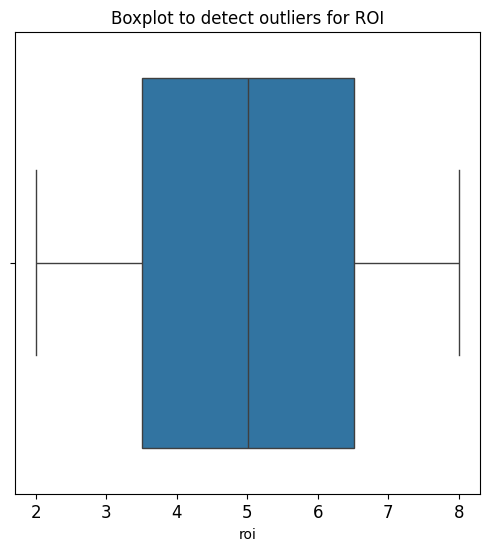

In [13]:
# Create a boxplot to visualize distribution of `ROI` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for ROI', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['roi'])
plt.show()

There is no outliners from ROI column.

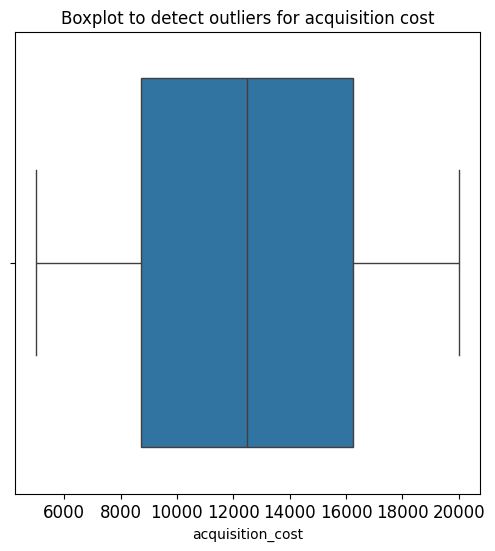

In [14]:
# Create a boxplot to visualize distribution of `acquisition_cost` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for acquisition cost', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['acquisition_cost'])
plt.show()

There is also no outliners from acquistion cost.

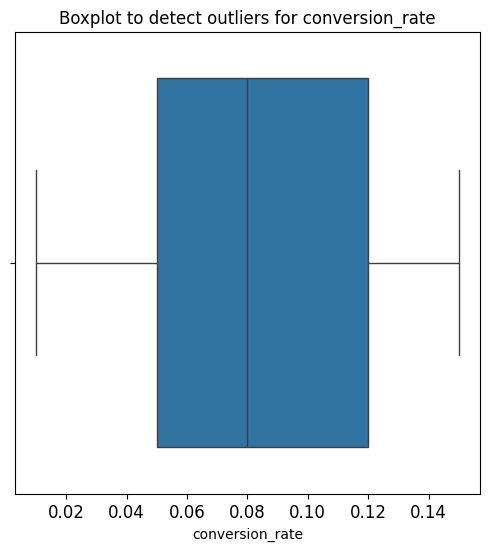

In [15]:
# Create a boxplot to visualize distribution of `conversion_rate` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for conversion_rate', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['conversion_rate'])
plt.show()

There is no outliners from conversion rate.

## Analysing the data

### EDA (exploring and analysing the data)

#### Data Structring



* Identifying the target_audiences within the dataset.

In [20]:
# Get the unique target audiences
unique_target_audiences = df['target_audience'].unique()

# Get the number of unique target audiences
num_unique_target_audiences = len(unique_target_audiences)

# Print the results
print(f"There are {num_unique_target_audiences} unique target audiences in the dataset:")
for audience in unique_target_audiences:
    print(f"- {audience}")

There are 5 unique target audiences in the dataset:
- Men 18-24
- Women 35-44
- Men 25-34
- All Ages
- Women 25-34


In [21]:
# Get the unique customer segments
unique_customer_segments = df['customer_segment'].unique()

# Get the number of unique customer segments
num_unique_customer_segments = len(unique_customer_segments)

# Print the results
print(f"There are {num_unique_customer_segments} unique customer segments in the dataset:")
for segment in unique_customer_segments:
    print(f"- {segment}")

There are 5 unique customer segments in the dataset:
- Health & Wellness
- Fashionistas
- Outdoor Adventurers
- Foodies
- Tech Enthusiasts


* Creating histogram to determine how data is distributed.

Refering histogram, the data of convention rate has uniform distribution, indicating that most data points are evenly distributed.

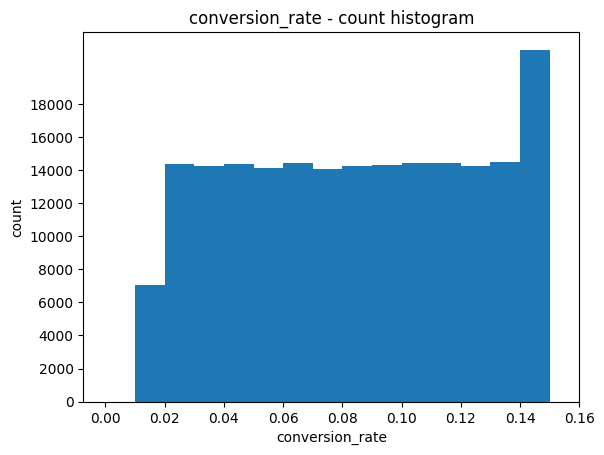

In [22]:


# creating histogram

import matplotlib.pyplot as plt
import numpy as np

# Create histogram
# Use numpy's arange function to create bins with floating-point numbers
plt.hist(df['conversion_rate'], bins=np.arange(0.00, 0.16, 0.01))
plt.xticks(np.arange(0.00, 0.17, 0.02))  # Use np.arange for x-axis ticks
plt.yticks(range(0, 20000, 2000))
plt.xlabel('conversion_rate')
plt.ylabel('count')
plt.title('conversion_rate - count histogram')
plt.show()



The histograh show that data has uniform distribution.

In [23]:
# Calculate the frequency of each unique conversion rate
conversion_rate_counts = df['conversion_rate'].value_counts()

# Display the results
print(conversion_rate_counts)

conversion_rate
0.13    14468
0.10    14437
0.06    14402
0.11    14399
0.02    14386
0.04    14339
0.09    14318
0.12    14263
0.08    14251
0.03    14225
0.05    14143
0.14    14125
0.07    14060
0.15     7160
0.01     7024
Name: count, dtype: int64


I want to identify that conversion rate and ROI are related.

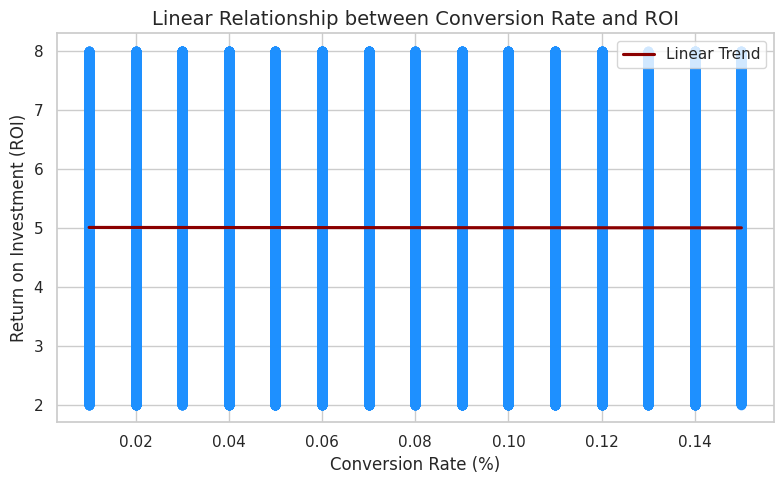

In [28]:
# Create regression plot
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x='conversion_rate',
    y='roi',
    color='dodgerblue',
    line_kws={'color': 'darkred', 'label': 'Linear Trend'}
)

# Add titles and labels
plt.title('Linear Relationship between Conversion Rate and ROI', fontsize=14)
plt.xlabel('Conversion Rate (%)', fontsize=12)
plt.ylabel('Return on Investment (ROI)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The correlation between ROI and convension rate is weak , it means they are not related to each other.

Creating histogram to understand which target audince and customer segment has higher ROI.

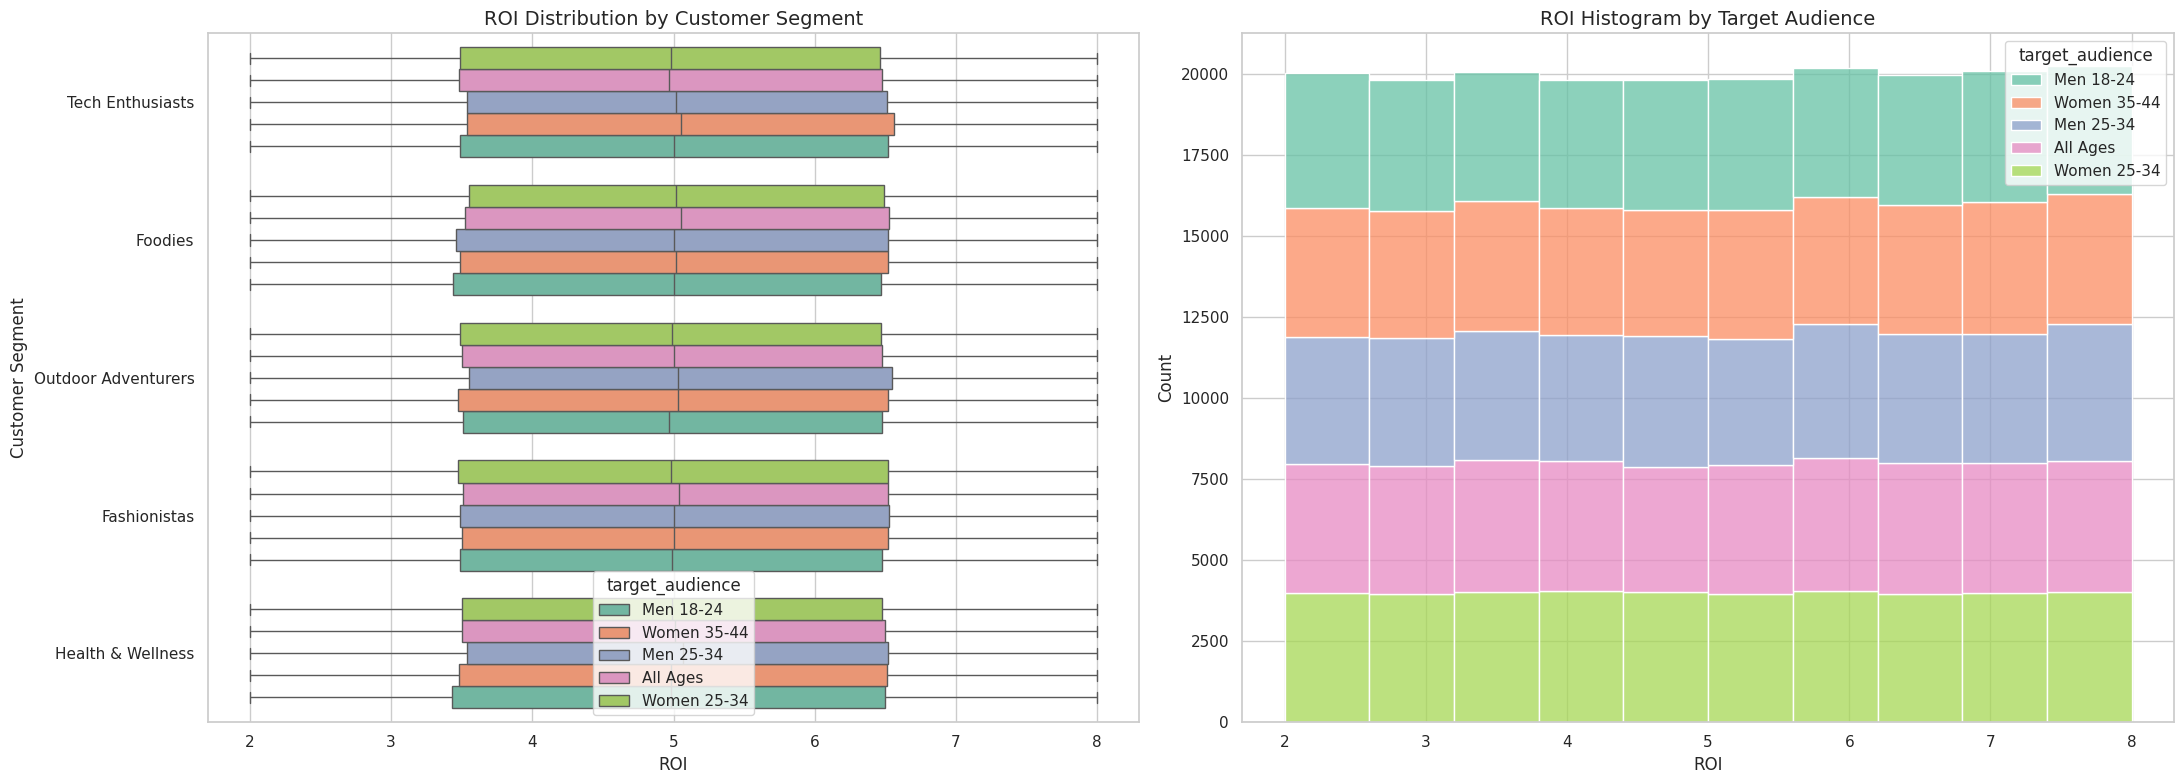

In [31]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
sns.set(style="whitegrid")

# --- Boxplot: ROI by Customer Segment grouped by Target Audience ---
sns.boxplot(
    data=df,
    x='roi',
    y='customer_segment',
    hue='target_audience',
    orient="h",
    ax=ax[0],
    palette='Set2'
)
ax[0].invert_yaxis()
ax[0].set_title('ROI Distribution by Customer Segment', fontsize=14)
ax[0].set_xlabel('ROI')
ax[0].set_ylabel('Customer Segment')

# --- Histogram: ROI grouped by Target Audience ---
sns.histplot(
    data=df,
    x='roi',
    hue='target_audience',
    multiple='stack',
    bins=10,
    ax=ax[1],
    palette='Set2'
)
ax[1].set_title('ROI Histogram by Target Audience', fontsize=14)
ax[1].set_xlabel('ROI')
ax[1].set_ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()